In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# How much money does capitalist Danny currently have tucked away?

<img src="https://scontent-arn2-1.xx.fbcdn.net/v/t1.0-9/35540089_10213611756986086_7229742011547385856_n.jpg?_nc_cat=0&oh=0b74863593a40ddc237f836f981318d7&oe=5BA7268C">

Recently Danny published is projected earnings if he was going to make 0% extra, 1% extra, and 3% extra contributions to his portfolio. The graph representing these earnings was questionable but never-the-less we can start with these numbers and extrapolate how much principal Danny currently has invested.

Starting with the most simple formula there is, we can use the simple compound interest formula. Now since we expect Danny to be making more contributions since that was the goal of the mailing this will obviously be false but it will establish a baseline.

In [33]:
def compound_interest(A, r, n, t):
    """
    A = P(1 + r/n)^(nt)
    A : final amount
    P : principal amount
    r : interest rate
    n : number of compounds per year
    t : years to compound
    
    returns the principal from the simple compound interest formula
    """
    
    return A/(1 + r/n)**(n*t) 

Assuming Danny had 1 MILLION DOLLARS upon his retirement at age 67 (he is like 37 now so thats a nice round 30 years), his principal with an assumed 8% growth rate (the assumed growth rate of the stock market over 20 years) Danny would have a paltry $91,443 tucked away.

In [42]:
compound_interest(1000000, 0.08, 12, 30 )

91443.37244024721

Now using the given end amounts that Danny will use to vacation in Bali, we can estimate the original principals and make some assumed commentary on the quality of Danny's portfolio managers.

In [64]:
A0 = 828750
A1 = 874053
A3 = 963973

print('with no extra contribution:', compound_interest(A0, 0.08, 12, 30))
print('with 1% extra contribution:', compound_interest(A1, 0.08, 12, 30))
print('with 3% extra contribution:', compound_interest(A3, 0.08, 12, 30))

with no extra contribution: 75783.69490985488
with 1% extra contribution: 79926.35401151539
with 3% extra contribution: 88148.94206134243


The first thing we notice is that Danny hasn't saved a lot of money for being 37. [According to CNBC](https://www.cnbc.com/2017/02/22/heres-how-much-money-you-should-have-saved-at-every-age.html) Danny should have thre times his annual salary saved by 40 and twice by 35 so lets call it 2.5 times saved. Since Michigan is an open records state we can see that Danny currently makes $80,489.25 as a Tenure Track Assistant Professor. Thus assuming he has saved the recommended amount he will have saved:

In [65]:
2.5*80489.25

201223.125

This is quite a bit more than predicted by our simple calculation from before. Since we can't change the principal (that's what we want to know!), changing the number of compounding times isn't going to do that much, and we know Danny will work for at least 30 more years, then we have to change the interest rate.

In [69]:
print('with no extra contribution:', compound_interest(A0, 0.05, 12, 30))
print('with 1% extra contribution:', compound_interest(A1, 0.05, 12, 30))
print('with 3% extra contribution:', compound_interest(A3, 0.05, 12, 30))

with no extra contribution: 185496.29113777142
with 1% extra contribution: 195636.30740011163
with 3% extra contribution: 215762.7948801821


Lets make a nice graph out of this to see how the principal changes as we change the interest rate.

(0.02, 0.12)

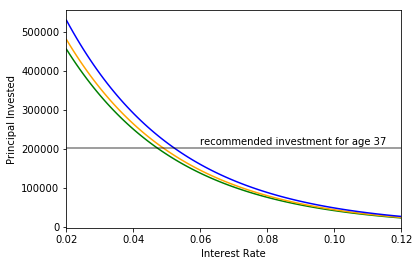

In [108]:
interest_rate = np.linspace(0.02, 0.12, 100)
principal_0 = [compound_interest(A0, i, 12, 30) for i in interest_rate]
principal_1 = [compound_interest(A1, i, 12, 30) for i in interest_rate]
principal_3 = [compound_interest(A3, i, 12, 30) for i in interest_rate]

fig, ax = plt.subplots()
ax.plot(interest_rate, principal_0, color='green')
ax.plot(interest_rate, principal_1, color='orange')
ax.plot(interest_rate, principal_3, color='blue')

ax.set_ylabel('Principal Invested')
ax.set_xlabel('Interest Rate')

ax.plot([0, 0.15], [201223,201223], color='black', alpha=0.5)
ax.text(s='recommended investment for age 37', x=0.06, y=210925)

ax.set_xlim(0.02, 0.12)


Thus Danny either has a small amount invested for his age, or his portfolio is incredibly conservative in it's growth estimate. But really, this is such a simple model it doesn't even do what his mailing was recommending, adding more to the account per month. Thus lets add a complication, monthly contributions.

In [158]:
def compound_interest_with_contributions(A, r, n, t, PMT):
    """
    A = P(1 + r/n)^(nt) + PMT * (((1 + r/n)**(n*t) - 1)/(r/n))*(1+r/n)
    A : final amount
    P : principal amount
    r : interest rate
    n : number of compounds per year
    t : years to compound
    PMT : monthly contribution
    
    this returns the original principal assuming a constant monthly contribution
    """
    
    rate = (1 + r/n)
    contributions = PMT * (((1 + r/n)**(n*t) - 1)/(r/n))*(1+r/n)
    return (A - contributions)/rate**(n*t)

In [159]:
# testing to make sure the function does the minimum of what the previous function did.
print(compound_interest_with_contributions(A0, 0.08, 12, 30, 0))
print(compound_interest_with_contributions(A1, 0.08, 12, 30, 0))
print(compound_interest_with_contributions(A3, 0.08, 12, 30, 0))

75783.69490985488
79926.35401151539
88148.94206134243


## Investigating Danny's principal invested with monthly payments

We need to make a few more assumptions. Now given that this is probably an employee defined plan (since I've never received something like this for an IRA) and Danny works for the state he probably has a 403b. Let's assume Danny is responsible and maxes out his contributions [which are currently set at $18500](https://thefinancebuff.com/401k-403b-ira-contribution-limits.html). Now the grayed out lines are from our original simple equation. Now with maxed out annual contributions we can see that Danny does have a bit tucked away. In fact we are now predicting for any sort of reasonable growth rate Danny probably does have enough invested currently to actually make his target amounts (A0, A1, and A3) or even exceed them, hence the negative amounts.

(0.02, 0.12)

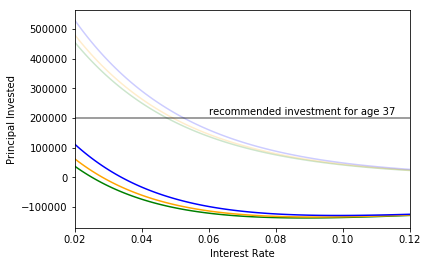

In [160]:
interest_rate = np.linspace(0.02, 0.12, 100)
principal_0_contr = [compound_interest_with_contributions(A0, i, 12, 30, 18500/12) for i in interest_rate]
principal_1_contr = [compound_interest_with_contributions(A1, i, 12, 30, 18500/12) for i in interest_rate]
principal_3_contr = [compound_interest_with_contributions(A3, i, 12, 30, 18500/12) for i in interest_rate]

fig, ax = plt.subplots()

ax.plot(interest_rate, principal_0_contr, color='green')
ax.plot(interest_rate, principal_1_contr, color='orange')
ax.plot(interest_rate, principal_3_contr, color='blue')

ax.plot(interest_rate, principal_0, color='green', alpha=0.2)
ax.plot(interest_rate, principal_1, color='orange', alpha=0.2)
ax.plot(interest_rate, principal_3, color='blue', alpha=0.2)

ax.set_ylabel('Principal Invested')
ax.set_xlabel('Interest Rate')

ax.plot([0, 0.15], [201223,201223], color='black', alpha=0.5)
ax.text(s='recommended investment for age 37', x=0.06, y=210925)

ax.set_xlim(0.02, 0.12)

## Investigating Danny's principal invested with variable interest rates

But what about variable interest rates? The market certainly fluctuates. For that we can use the previous equation but altered a bit. Instead of taking the exponent which sets a standard rate we can set a variable rate by taking the product instead:

$$A = P(1 + r/n)^{nt} + PMT * (((1 + r/n)^{nt} - 1)/(r/n))*(1+r/n)$$

becomes:

$$ A = P(1 +r_1)*(1+r_2)*(1+r_3)... $$
$$+ $$
$$PMT*(((1 + r_1)(1+r_2)(1+r_3)... - 1)/(r/n))(1+r/n)$$

This obviously becomes a bit complicated but instead of having a rather long product like this, we could instead assume the exponents in the previous equation are 1 and calculate the values over time for the interest rates. First we need to generate a lot of interest rates to pull from over time. Then we can extrapolate back 30 years the previous principals.

''

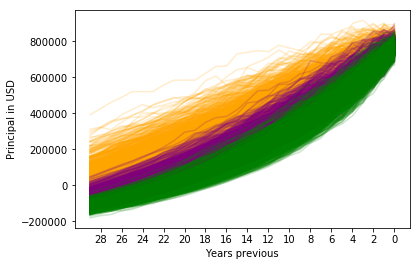

In [164]:
rates =[0.02, 0.04, 0.06]
runs = np.arange(1000)
years = np.arange(0, 30, 1)
fig, ax = plt.subplots()
color = {0.04:'purple', 0.06:'green', 0.02:'orange'}


for rate in rates:
    interest_rates = np.random.normal(loc=rate, scale=0.04, size=50000)

    for run in runs:
        previous_principals = []
        previous_principal = None

        for y in years:
            if previous_principal is None:
                previous_principal = A0
            this_years_interest = np.random.choice(interest_rates)
            previous_principal = compound_interest_with_contributions(previous_principal, this_years_interest, 12, 1, 18500/12)
            previous_principals.append(previous_principal)

        ax.plot(years, previous_principals, alpha=0.2, color=color[rate])

# ax.set_yscale('log')
ax.set_ylabel('Principal in USD')
ax.set_xlabel('Years previous')
ax.invert_xaxis()
ax.set_xticks(years[::2])
ax.set_xticklabels(years[::2])
''

What we see here is that for higher interest rates with 0% extra contributions Danny should be able to save enough assuming his invested original principal is enough.

When the number is negative it is implying that Danny has more saved than he actually has saved. Assuming that I did everything right (always a bad assumption), this could mean that the growth projections that Danny's 403b are using are either too simple (using the simple compound growth formula which gave positive estimates for reasonable interest rates), I don't understand them, or they are severly under predicting the growth over the next 30 years for his portfolio.

Testing the hypothesis that they are using the simple compound interest formula we can set the yearly contributions and run the simulation again.

''

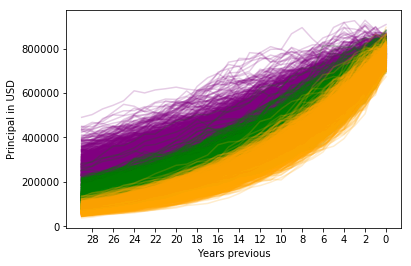

In [166]:
rates =[0.04, 0.06, 0.08]
runs = np.arange(1000)
years = np.arange(0, 30, 1)
fig, ax = plt.subplots()
color = {0.04:'purple', 0.06:'green', 0.08:'orange'}


for rate in rates:
    interest_rates = np.random.normal(loc=rate, scale=0.04, size=50000)

    for run in runs:
        previous_principals = []
        previous_principal = None

        for y in years:
            if previous_principal is None:
                previous_principal = A0
            this_years_interest = np.random.choice(interest_rates)
            previous_principal = compound_interest_with_contributions(previous_principal, this_years_interest, 12, 1, 0)
            previous_principals.append(previous_principal)

        ax.plot(years, previous_principals, alpha=0.2, color=color[rate])

# ax.set_yscale('log')
ax.set_ylabel('Principal in USD')
ax.set_xlabel('Years previous')
ax.invert_xaxis()
ax.set_xticks(years[::2])
ax.set_xticklabels(years[::2])
''

Using our CNBC reasoning that Danny should have $201223 tucked away by now, we can immediately reject purple growth rates (rates with an average growth of 4%). This restricts us to 6 and 8% average growth rates. Lets try and isolate what average growth rate is being used by using the contributions A0, A1, and A3. We can also capture the predicted results and finally extrapolate his currently invested amount.

''

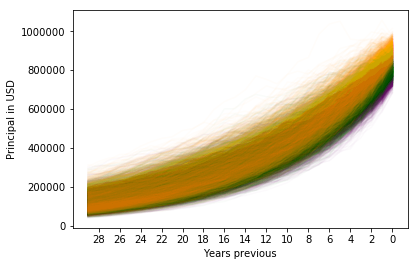

In [197]:
end_amounts = [A0, A1, A3]
rates =[0.06, 0.08]
runs = np.arange(1000)
years = np.arange(0, 30, 1)
color = {A0:'purple', A1:'green', A3:'orange'}
fig, ax = plt.subplots()

current_amounts = {}

for end_A in end_amounts:
    current_amount_for_end_A = []
    for rate in rates:
        interest_rates = np.random.normal(loc=rate, scale=0.04, size=50000)

        for run in runs:
            previous_principals = []
            previous_principal = None

            for y in years:
                if previous_principal is None:
                    previous_principal = end_A
                this_years_interest = np.random.choice(interest_rates)
                previous_principal = compound_interest_with_contributions(previous_principal, this_years_interest, 12, 1, 0)
                previous_principals.append(previous_principal)

            ax.plot(years, previous_principals, alpha=0.02, color=color[end_A])
            
            current_amount_for_end_A.append(previous_principals[-1])
            
    current_amounts[end_A] = np.array(current_amount_for_end_A)
            

# ax.set_yscale('log')
ax.set_ylabel('Principal in USD')
ax.set_xlabel('Years previous')
ax.invert_xaxis()
ax.set_xticks(years[::2])
ax.set_xticklabels(years[::2])
''

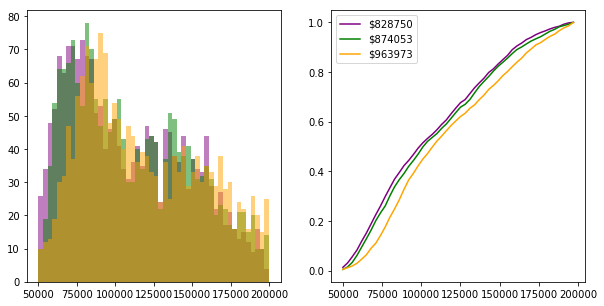

In [256]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))


h0, e0, _ = ax.hist(current_amounts[A0], bins=50, range=(50000, 200000), alpha=0.5, color=color[A0])
h1, e1, _ = ax.hist(current_amounts[A1], bins=50, range=(50000, 200000), alpha=0.5, color=color[A1])
h3, e3, _ = ax.hist(current_amounts[A3], bins=50, range=(50000, 200000), alpha=0.5, color=color[A3])

ax2.plot( e0[:-1],h0.cumsum()/h0.cumsum().max(), color=color[A0], label='$'+str(A0))
ax2.plot(e0[:-1],h1.cumsum()/h1.cumsum().max(),  color=color[A1], label='$'+str(A1))
ax2.plot(e0[:-1],h3.cumsum()/h3.cumsum().max(), color=color[A3], label='$'+str(A3))

ax2.legend()



We can see here that for predicted current values >$100,000 there isn't much disagreement between the different ending amounts for the starting principal. Why don't we just combine them all and look at the maximum value in the PDF and just assume thats probably what Danny's portfolio is currently valued at. It's not the best statistics but I've been doing this for hours and whatever I'm bored.

In [252]:
values = []
for v in current_amounts.values():
    for val in v:
        values.append(val)

maximum value based on the simulation: $ 80000.0


(0, 1.5e-05)

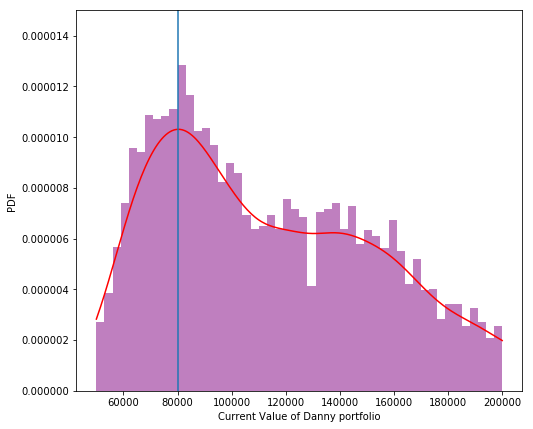

In [288]:
fig, ax = plt.subplots(figsize=(8, 7))

h0, e0, _ = ax.hist(values, bins=50, range=(50000, 200000), alpha=0.5, color=color[A0], normed=True)
# ax2.plot( e0[:-1],h0.cumsum()/h0.cumsum().max(), color=color[A0], label='$'+str(A0))

kde = stats.gaussian_kde(values)
xs = np.linspace(e0.min() - 1, e0.max() + 1, 200)
ax.plot(xs, kde(xs), color='red')
# kde(xs)
ax.set_ylabel('PDF')
ax.set_xlabel('Current Value of Danny portfolio')


print('maximum value based on the simulation: $', e0[h0.argmax()])

ax.plot([ e0[h0.argmax()], e0[h0.argmax()]], [0, 0.000015])
ax.set_ylim(0, 0.000015)

Looking here we estimate the maximum value based on the simulations to be $80000. The simulations extrapolated this number from the their projected value in 30 years. These projected values came with strong caveats given that they probably are not market representative since they seem to be based on very simple compound interest formulas. This should all be taken with a grain of salt since past performance does not indicate future performance and John rarely knows what he's doing.